# 0.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ441B/fraudTest.csv")

In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
df_select=df[['trans_date_trans_time','category','amt','city_pop',"is_fraud"]]
df_select['trans_date_trans_time']=pd.to_datetime(df_select['trans_date_trans_time'])
df_select['time_var']=[i.month for i in df_select["trans_date_trans_time"]]
X=pd.get_dummies(df_select,['category']).drop(['trans_date_trans_time','is_fraud'],axis=1)
y=df_select['is_fraud']

<ipython-input-5-6a5a2ddce9fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['trans_date_trans_time']=pd.to_datetime(df_select['trans_date_trans_time'])
<ipython-input-5-6a5a2ddce9fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['time_var']=[i.month for i in df_select["trans_date_trans_time"]]


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [8]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [9]:
ros=RandomOverSampler(random_state=0)
over_X,over_y=ros.fit_resample(X_train,y_train)

In [10]:
rus=RandomUnderSampler(random_state=0)
under_X,under_y=rus.fit_resample(X_train,y_train)

In [11]:
SMOTEsample=SMOTE()
smote_X,smote_y=SMOTEsample.fit_resample(X_train,y_train)

# 3.) Train three logistic regression models 

In [12]:
from sklearn.linear_model import LogisticRegression

In [14]:
log_reg1= LogisticRegression().fit(over_X,over_y)

In [15]:
log_reg2=LogisticRegression().fit(under_X,under_y)

In [16]:
log_reg3=LogisticRegression().fit(smote_X,smote_y)

# 4.) Test the three models

In [17]:
test_prediction1 = log_reg1.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, test_prediction1)
print(cm1)

[[157456   8635]
 [   171    454]]


In [20]:
test_prediction2 = log_reg2.predict(X_test)
cm2 = confusion_matrix(y_test, test_prediction2)
print(cm2)

[[ 27969 138122]
 [    26    599]]


In [22]:
test_prediction3 = log_reg3.predict(X_test)
cm3 = confusion_matrix(y_test, test_prediction3)
print(cm3)

[[ 27186 138905]
 [    24    601]]


# 5.) Which performed best in Out of Sample metrics?

In [23]:
from sklearn.metrics import accuracy_score, precision_score
print("Accuracy for over:", accuracy_score(y_test, test_prediction1))
print("Precision for over:", precision_score(y_test, test_prediction1))

Accuracy for over: 0.9471796348280909
Precision for over: 0.04995048960281659


In [24]:
print("Accuracy for under:", accuracy_score(y_test, test_prediction2))
print("Precision for under:", precision_score(y_test, test_prediction2))

Accuracy for under: 0.1713572782456393
Precision for under: 0.0043180196221192175


In [25]:
print("Accuracy for under:", accuracy_score(y_test, test_prediction3))
print("Precision for under:", precision_score(y_test, test_prediction3))

Accuracy for under: 0.1666726648911922
Precision for under: 0.0043080584347626625


In [41]:
from sklearn.metrics import roc_auc_score
auc1=roc_auc_score(y_test,log_reg1.predict_proba(X_test)[:, 1])
print("auc for oversample:",auc1)

auc for oversample: 0.8312723795991355


In [42]:
auc2=roc_auc_score(y_test,log_reg2.predict_proba(X_test)[:, 1])
print("auc for undersample:",auc2)

auc for undersample: 0.8119048088096286


In [43]:
auc3=roc_auc_score(y_test,log_reg3.predict_proba(X_test)[:, 1])
print("auc for undersample:",auc3)

auc for undersample: 0.8129083454250984


As we can see from the result above, the auc score and accuracy for oversample model is the highest among all three models, so we may choose oversample model over other models.

# 6.) Pick two features and plot the two classes before and after SMOTE.

In [45]:
raw_temp=pd.concat([X_train,y_train],axis=1)

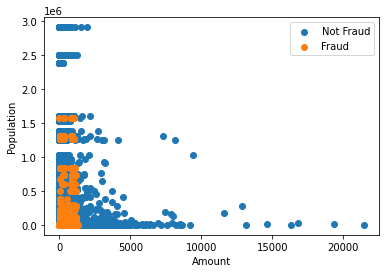

In [59]:
import matplotlib.pyplot as plt
plt.scatter(raw_temp[raw_temp["is_fraud"]==0]['amt'],raw_temp[raw_temp['is_fraud']==0]['city_pop'])
plt.scatter(raw_temp[raw_temp['is_fraud']==1]['amt'],raw_temp[raw_temp["is_fraud"]==1]['city_pop'])
plt.legend(["Not Fraud","Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")
plt.show()

In [60]:
smote_temp=pd.concat([smote_X,smote_y],axis=1)

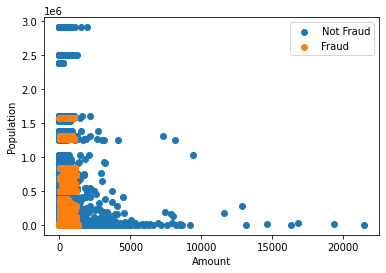

In [61]:
plt.scatter(smote_temp[smote_temp["is_fraud"]==0]['amt'],smote_temp[smote_temp['is_fraud']==0]['city_pop'])
plt.scatter(smote_temp[smote_temp['is_fraud']==1]['amt'],smote_temp[smote_temp["is_fraud"]==1]['city_pop'])
plt.legend(["Not Fraud","Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")
plt.show()
